In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# num_words 많이 등장한 1000개의 단어

2110848/2110848 [==============================] - 0s 0us/step


In [12]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [18]:
X_train.shape # 8982 뉴스기사
X_train[0] # 숫자로 인코딩된 상태 (리스트)
y_train # 뉴스기사 카테고리
np.max(y_train) # 45
np.min(y_train) # 0
# 46가지의 뉴스 카테고리

0

In [21]:
len(X_train[0])
len(X_train[1])
len(X_train[2])
# 뉴스 기사의 길이가 모두 다름

139

In [22]:
# 모든 문장의 최대 길이를 100으로 정함
X_train = sequence.pad_sequences(X_train,maxlen = 100)
X_test = sequence.pad_sequences(X_test,maxlen = 100)

In [23]:
# y_train 원핫인코딩(46차원)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
model = Sequential()

In [27]:
model.add(Embedding(1000,100))
model.add(LSTM(100))
model.add(Dense(46,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5)

In [31]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.2108 - accuracy: 0.4402 - val_loss: 1.8136 - val_accuracy: 0.5352
Epoch 2/200
450/450 [==============================] - 19s 42ms/step - loss: 1.7274 - accuracy: 0.5590 - val_loss: 1.6479 - val_accuracy: 0.5850
Epoch 3/200
450/450 [==============================] - 19s 43ms/step - loss: 1.5172 - accuracy: 0.6147 - val_loss: 1.4994 - val_accuracy: 0.6251
Epoch 4/200
450/450 [==============================] - 19s 43ms/step - loss: 1.3310 - accuracy: 0.6623 - val_loss: 1.3746 - val_accuracy: 0.6483
Epoch 5/200
450/450 [==============================] - 19s 43ms/step - loss: 1.2175 - accuracy: 0.6906 - val_loss: 1.3012 - val_accuracy: 0.6692
Epoch 6/200
450/450 [==============================] - 20s 44ms/step - loss: 1.1315 - accuracy: 0.7138 - val_loss: 1.2575 - val_accuracy: 0.6750
Epoch 7/200
450/450 [==============================] - 19s 43ms/step - loss: 1.0569 - accuracy: 0.7278 - val_loss: 1.2159 - val_ac

In [32]:
print('\n Test Accuracy:%.4f'%(model.evaluate(X_test,y_test))[1])

71/71 [==============================] - 1s 19ms/step - loss: 1.2538 - accuracy: 0.7284

 Test Accuracy:0.7284


In [ ]:
history = model.fit(X_train,y_train,batch_size=20, epochs= 200,
                   validation_split =0.2 , callbacks = [early_stopping_callback])

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
data = pd.read_csv("tsla.us.txt")
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [57]:
data.describe()
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [58]:
training_size = int(len(data)*0.80)
data_len = len(data)

In [59]:
train, test = data[0:training_size],data[training_size:data_len]

In [60]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [61]:
train = train.loc[:,['Open']].values

In [63]:
train.shape

(1486, 1)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
train_scaled = scaler.fit_transform(train) # 정규화

In [65]:
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [66]:
end_len = len(train_scaled)
end_len

1486

In [67]:
X_train = []
y_train = []
timesteps = 40

In [68]:
for i in range(timesteps,end_len):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

In [69]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [71]:
X_train.shape # (1446,40)
y_train.shape # (1446,)

(1446,)

In [73]:
# RNN : 입력 데이터의 구조를 3차원으로 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape 
# (1446, 40, 1)
# (데이터 개수, time step, dimension)

(1446, 40, 1)

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [103]:
regressor = Sequential()

In [104]:
regressor.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True,
                        input_shape=(X_train.shape[1],1))) # input_shape 초기에만 설정
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation = 'tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [105]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [106]:
epochs = 100
batch_size = 20

In [107]:
regressor.fit(X_train,y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
73/73 [==============================] - 4s 15ms/step - loss: 0.2684
Epoch 2/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1235
Epoch 3/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0750
Epoch 4/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0558
Epoch 5/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0414
Epoch 6/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0319
Epoch 7/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0267
Epoch 8/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0242
Epoch 9/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0207
Epoch 10/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0172
Epoch 11/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0162
Epoch 12/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0159
Epoch 13/100
73/73 [=====

In [108]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [109]:
real_price = test.loc[:, ["Open"]].values

In [110]:
dataset_total = pd.concat((data['Open'], test['Open']),axis = 0)
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [111]:
inputs = dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)
inputs.shape

(412, 1)

In [112]:
inputs = scaler.transform(inputs)
print(inputs)

[[1.3409568 ]
 [1.34003609]
 [1.31425625]
 [1.32125364]
 [1.290281  ]
 [1.24115199]
 [1.2329761 ]
 [1.22918278]
 [1.19228078]
 [1.19957279]
 [1.20200346]
 [1.1776231 ]
 [1.23415461]
 [1.25164807]
 [1.24096785]
 [1.22826207]
 [1.21776599]
 [1.24387729]
 [1.24041542]
 [1.25525725]
 [1.24339852]
 [1.23290244]
 [1.25153758]
 [1.25002762]
 [1.23945789]
 [1.22910912]
 [1.18830332]
 [1.18056937]
 [1.14771848]
 [1.11814532]
 [1.11604611]
 [1.11991309]
 [1.16418075]
 [1.04588812]
 [1.04356793]
 [1.07118919]
 [1.04916584]
 [1.06566494]
 [1.05461643]
 [1.05461643]
 [0.73826097]
 [0.74308548]
 [0.75262402]
 [0.76915995]
 [0.76197842]
 [0.7562332 ]
 [0.74927264]
 [0.7507826 ]
 [0.74341693]
 [0.75903215]
 [0.80160572]
 [0.80595146]
 [0.77799875]
 [0.74894119]
 [0.74665783]
 [0.73954996]
 [0.74128089]
 [0.7427172 ]
 [0.74894119]
 [0.75328693]
 [0.67517401]
 [0.6612529 ]
 [0.64048171]
 [0.64346481]
 [0.68408647]
 [0.69601886]
 [0.72489228]
 [0.69973852]
 [0.71295989]
 [0.71395426]
 [0.72537105]
 [0.74

In [113]:
X_test = []
for i in range(timesteps,412) :
    X_test.append(inputs[i-timesteps:i,0])

In [114]:
X_test = np.array(X_test)

In [115]:
print(X_test.shape)

(372, 40)


In [116]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [117]:
pred = regressor.predict(X_test)

12/12 [==============================] - 0s 5ms/step


In [118]:
pred.shape

(372, 1)

In [119]:
pred=scaler.inverse_transform(pred)
pred

array([[269.44724],
       [243.68828],
       [224.14676],
       [223.70839],
       [222.6968 ],
       [226.76028],
       [221.72453],
       [214.85988],
       [213.20312],
       [213.82881],
       [215.59677],
       [219.17871],
       [226.17017],
       [223.39932],
       [213.09874],
       [209.28201],
       [210.75243],
       [212.7182 ],
       [209.69865],
       [207.12444],
       [210.45686],
       [202.13597],
       [192.84343],
       [188.6791 ],
       [184.16164],
       [189.27406],
       [195.5199 ],
       [201.49373],
       [200.05264],
       [197.73958],
       [199.43912],
       [198.1846 ],
       [204.51952],
       [208.54   ],
       [211.86768],
       [214.12898],
       [212.90594],
       [213.90822],
       [212.51451],
       [217.06612],
       [220.43738],
       [220.63292],
       [219.45288],
       [218.48349],
       [220.9645 ],
       [223.37065],
       [223.70857],
       [225.04552],
       [227.50589],
       [226.4726 ],


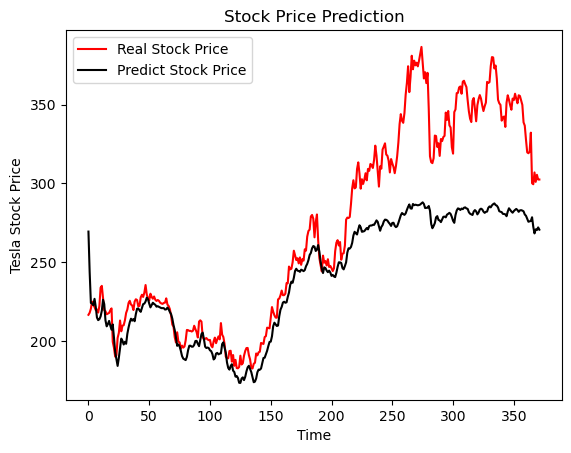

In [120]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(pred, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [121]:
#1. LSTM 변경 RNN과 비교
#2. 관신있는 회사에 대해 예측 모델

In [158]:
data = pd.read_csv("Stocks/ibm.us.txt")
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0
...,...,...,...,...,...,...,...
14054,2017-11-06,150.2700,150.3200,148.7900,149.3500,4543499,0
14055,2017-11-07,149.8700,150.0100,149.0100,149.8500,3729501,0
14056,2017-11-08,150.1000,150.2800,148.7900,150.0700,4679520,0
14057,2017-11-09,149.9300,151.8000,149.8600,150.3000,4776388,0


In [159]:
training_size = int(len(data)*0.80)
data_len = len(data)

In [160]:
train, test = data[0:training_size],data[training_size:data_len]

In [161]:
train = train.loc[:,['Open']].values

In [162]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
train_scaled = scaler.fit_transform(train) # 정규화
train_scaled[0]

array([0.02706269])

In [163]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

In [164]:
for i in range(timesteps,end_len):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

In [165]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [166]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [167]:
regressor = Sequential()

In [168]:
regressor.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True,
                        input_shape=(X_train.shape[1],1))) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, activation = 'tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, activation = 'tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, activation = 'tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [169]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
561/561 [==============================] - 20s 28ms/step - loss: 0.0019
Epoch 2/100
561/561 [==============================] - 16s 28ms/step - loss: 0.0011
Epoch 3/100
561/561 [==============================] - 16s 28ms/step - loss: 8.9557e-04
Epoch 4/100
561/561 [==============================] - 16s 28ms/step - loss: 7.7371e-04
Epoch 5/100
561/561 [==============================] - 16s 28ms/step - loss: 7.9621e-04
Epoch 6/100
561/561 [==============================] - 15s 28ms/step - loss: 7.6627e-04
Epoch 7/100
561/561 [==============================] - 16s 28ms/step - loss: 6.7265e-04
Epoch 8/100
561/561 [==============================] - 16s 28ms/step - loss: 6.6938e-04
Epoch 9/100
561/561 [==============================] - 16s 28ms/step - loss: 6.6191e-04
Epoch 10/100
561/561 [==============================] - 16s 28ms/step - loss: 6.1832e-04
Epoch 11/100
561/561 [==============================] - 16s 28ms/step - loss: 6.4009e-04
Epoch 12/100
561/561 [================

In [ ]:
real_price = test.loc[:, ["Open"]].values

In [ ]:
dataset_total = pd.concat((data['Open'], test['Open']),axis = 0)

In [ ]:
inputs = dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(timesteps,412) :
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
pred_lstm = regressor.predict(X_test)
pred_lstm=scaler.inverse_transform(pred_lstm)

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True,
                        input_shape=(X_train.shape[1],1))) 
regressor2.add(Dropout(0.2))
regressor2.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(SimpleRNN(units=50, activation = 'tanh', return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(SimpleRNN(units=50, activation = 'tanh'))
regressor2.add(Dropout(0.2))
regressor2.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train, epochs=100, batch_size=20)

In [ ]:
real_price = test.loc[:, ["Open"]].values

In [ ]:
dataset_total = pd.concat((data['Open'], test['Open']),axis = 0)

In [ ]:
inputs = dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(timesteps,412) :
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
pred_lstm = regressor.predict(X_test)
pred_lstm=scaler.inverse_transform(pred_lstm)